In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)

In [2]:
#replace link by tweet corpus
tsv_file= r'C:\Users\omar\Desktop\WHOAX\sentiment-analysis\data\raw\tweets_en.tsv'
#upload file data in dataframe object and adding headline with name of column
df_tweet_en = pd.read_csv(tsv_file ,sep='|', error_bad_lines=False,names =
                          ["id", "sentiment", "nan", "lang","gender","url","text","hashtags","likes","retweets"])
#get head rows
df_tweet_en.head()

,id,sentiment,nan,lang,gender,url,text,hashtags,likes,retweets
0,1198677568,neutral,0,au,male,http://opengardensblog.futuretext.com/archives/2009/02/the_internet_of.html,RT @victoriajane: The internet of things and mobile devices - interesting read http://tinyurl.com/dmvzo8,NaN,0,0
1,1178370273,neutral,2,us,male,NaN,"amazed by another ""Internet of Things"" presentation completely ignoring the web. re-inventing so many wheels in slightly oval shapes...",NaN,0,0
2,1203167876,neutral,4,us,andy,http://www.softwareag.com/Corporate/Press/pressreleases/20090205_AllianceDigitalProductFlow_page.asp,The Internet of Things to Intelligent Business Processes - German Ministry of Education with €17.7 mil funding http://tinyurl.com/acqyjg,NaN,0,0
3,1158326686,neutral,5,es,andy,https://www.amazon.com/gp/reader/3540787305/ref=sib_dp_ptu,"del.icio.us: Amazon Online Reader : The Internet of Things: First International Conference, IOT 2008.. http://tinyurl.com/cqw7nx",NaN,0,0
4,1174367209,neutral,0,us,female,https://www.ibm.com/uk-en/,The Petabyte age and the internet of things http://ow.ly/9qm,NaN,0,0


In [3]:
df_tweet_en = df_tweet_en.reindex(np.random.permutation(df_tweet_en.index))  
df_tweet_en = df_tweet_en[['id','text', 'sentiment',"likes","retweets","gender","lang"]]

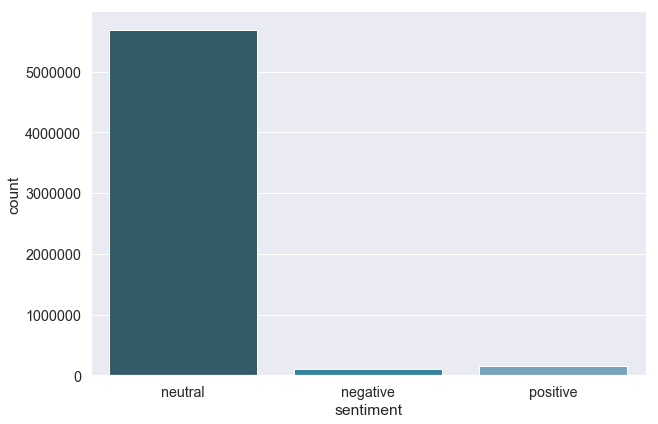

In [4]:
target_dist = sns.factorplot(x="sentiment", data=df_tweet_en, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [5]:
#delete duplicates : text and id 
df_tweet_en = df_tweet_en.drop_duplicates('text')
df_tweet_en = df_tweet_en.drop_duplicates('id')
#get sample by sentiment type 20000 tweets for each sentiment
df_tweet_en_neutral = df_tweet_en[df_tweet_en['sentiment'] == 'neutral'].sample(n=20000)
df_tweet_en_neutral
df_tweet_en_positive = df_tweet_en[df_tweet_en['sentiment'] == 'positive'].sample(n=20000)
df_tweet_en_positive
df_tweet_en_negative = df_tweet_en[df_tweet_en['sentiment'] == 'negative'].sample(n=20000)
df_tweet_en_negative


,id,text,sentiment,likes,retweets,gender,lang
4313493,731481696973918210,MT @CloudExpo: The #IoT is a mess https://t.co/ylRbb2iNA0 @ThingsExpo @iot2040 #BigData https://t.co/7x30N6aJzT,negative,2,21,male,gb
216304,336869505995247618,How the Internet of Things Changes Everything http://t.co/pM1Mhpt2Bm,negative,0,0,male,de
1667318,580396285846560768,The #IoT needs 1 thing most of all (sensible #UX) http://t.co/OO7dgPH8n3 via markhurst,negative,0,0,andy,tr
4720666,753232489066430464,The Internet of Things has a dirty little secret: it's not really yours https://t.co/0ltj9bvhM8 via @verge,negative,0,1,male,us
5019359,768987047881093120,IoT manufacturer caught fixing security holes. #IoT #smarthome #security https://t.co/x23YDJKOgE,negative,0,1,male,us
1116605,530737501439139841,My wife wrote a great piece for @nybooks on the (kinda creepy) 'internet of things.' http://t.co/d88lzWsqwj,negative,29,17,male,us
712981,480474888357302273,Internet of things concept is just mind boggling!!!,negative,0,0,andy,tr
5848960,809094431550959617,IoT with a potential to kill? Invest wisely in your #IoT security @RWW https://t.co/wj16WmyoDF https://t.co/sg1d7dZbgq,negative,2,1,andy,gb
5806919,807156605057781760,Don't let IoT spoil your holiday https://t.co/9QU3JoAMDp #IoT,negative,0,0,andy,se
4612127,747145648575758338,The 'Internet of Things' may not be all its cracked up to be https://t.co/DV6jPP66kv,negative,0,0,andy,gb


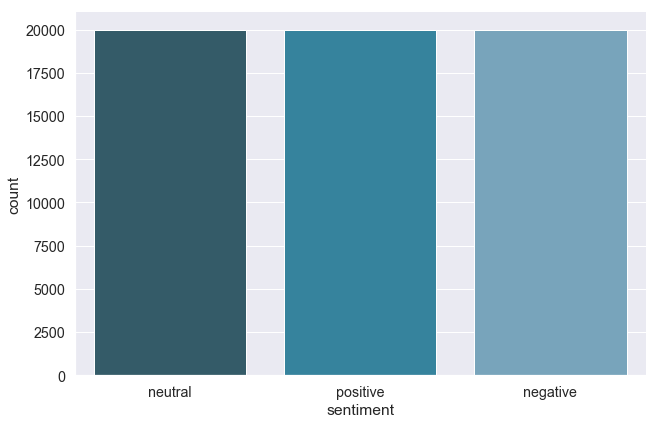

In [6]:
#append sampling
df_tweet = pd.concat([df_tweet_en_neutral,df_tweet_en_positive])
df_tweet = pd.concat([df_tweet,df_tweet_en_negative])
#show diagram 
target_dist = sns.factorplot(x="sentiment", data=df_tweet, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [7]:
df_tweet.head()

,id,text,sentiment,likes,retweets,gender,lang
557219,455645454395797504,5 ways Internet of things will create new opportunities for Indian businesses!Read here http://t.co/NiroT9Xa9I #DigitalUniverseIN @emcindia,neutral,0,0,andy,in
5084791,772456894460026880,"As #bigdata, #cloud, and #IoT usage increases, so do #security concerns https://t.co/lXwuN7CP6s via @ITProPortal https://t.co/8KPv2ZbcuY",neutral,0,0,andy,us
4330044,732544918938324992,Hewlett Packard Enterprise Co Launches an Internet of Things Platform https://t.co/qf8qKwAhFs #iot,neutral,1,0,andy,us
4846444,760146832488067072,"The Internet of Things is about to disrupt the digital economy, report says https://t.co/RFWzNYvNY1",neutral,0,1,male,gb
1338071,554825955378622464,How the #InternetOfThings is changing the World around Us http://t.co/iPz10oo7hc … #IoT,neutral,0,0,andy,us


In [8]:
df_tweet.to_pickle('df_tweet_en.p') # save dframe to pickle